Missing data sy deal karny ka 2 tareeqy(ways) hen
- Removing 
- Imputing

# Removing

Agar data ki kisi row mein ziada missing values hen to usy remove kar sakty hen ya agar kisi column mein buhat ziada missing values hen to usy bhi remove kar sakty hen magar isky liya data ki tadaad ziada honi chahiye. Is method ko CCA(Complete Case Analysis) kahty hen.

## Complete Case Analysis(CCA)

Complete Case Analysis also called 'list-wise deletion' of cases consists in discarding observations where values in any of the variables are missing.
CCA means literally analysing only those obervations for which there is information in aal of the variales in the dataset.
- Agar kisi bhi row ka kisi bhi column mein koe bhi value missing hai to pori row ko deletekar diya jayga 
- CCA tab apply ho ga agar data Randomly Missing ho Matlab aysa na ho ka Chunks mein data miss ho, data missing ki is type ko MCAR kaha jata hai
    - MCAR (Missing Completely At Random)
    - MAR (Missing At Random)
    - MNAR (Missing Not At Random)

- Agar 5% sy ziada data missing hai to CCA apply nahi karna
- Agar kisi column mein 95 % sy ziada data missing hai to us column ko hi hata hen.

` *Working*

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df=  pd.read_csv('D:\git\jaan_repo\ML_a_to_z\ml_resources/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [3]:
df.isnull().mean()*100

## har column ka percent wise missing data 

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [4]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [5]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
11660,0.769,Part time course,Masters,7.0,13.0
12405,0.897,Full time course,Masters,3.0,32.0
13481,0.624,NaN,NaN,3.0,33.0
3594,0.802,no_enrollment,Graduate,5.0,22.0
2691,0.920,no_enrollment,Graduate,11.0,62.0


In [6]:
len(df[cols].dropna()) / len(df)

## just check kia ka drop karny ka baad kitna % data bachy ga 

0.8968577095730244

In [7]:
new_df = df[cols].dropna()

## missing values ko drop kar diya or remaining data ko new_df mein store kia
df.shape, new_df.shape

((19158, 13), (17182, 5))

Jab bhi numerical columns par CCA perform karen to Before and after par CCA perform kar ka difference daikh len agar distribution mein koe major change aya hai to its not fine

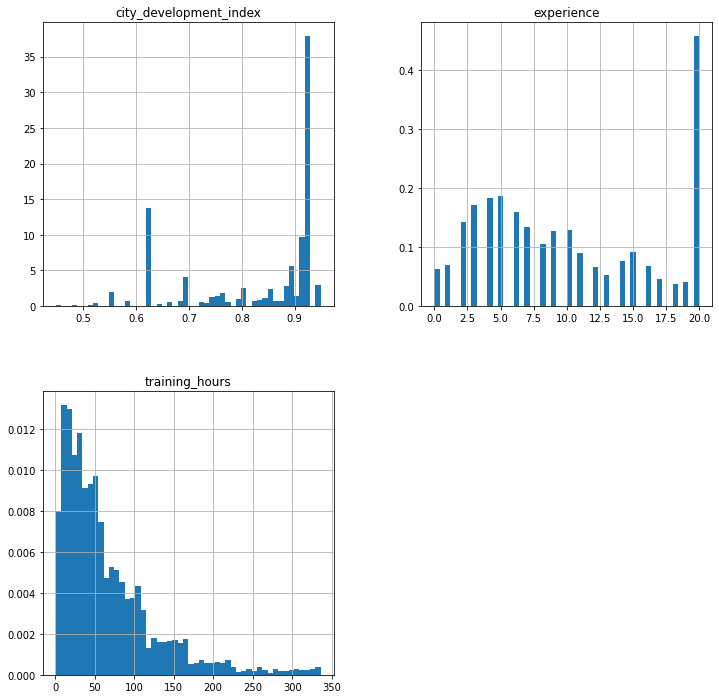

In [8]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

<AxesSubplot:>

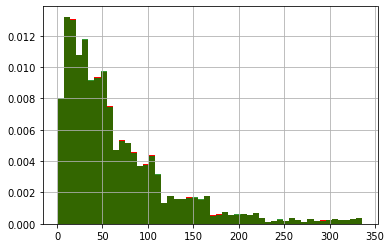

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

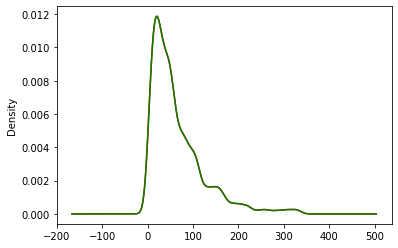

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<AxesSubplot:>

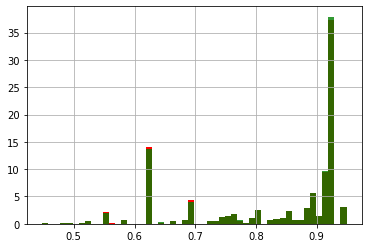

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

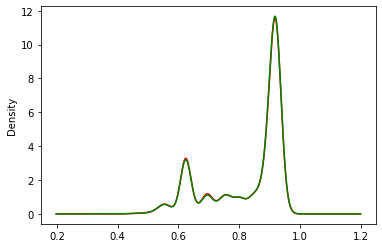

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<AxesSubplot:>

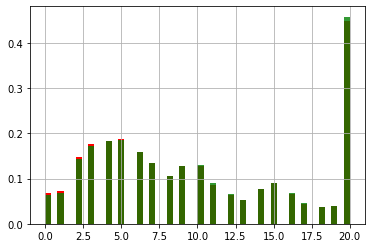

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

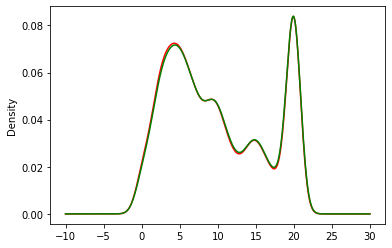

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [15]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

## Categoricalc olumns mein variables ki ratio same rahni chahiya

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [16]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


# Imputing

Numerical Values ko impute karny ka 2 method hen.
- Univariate Imputation
- Multivariate Imputation

## Univariate Imputation

|A|B|C|D|
|----|----|----|----|
|10|15|3|6|
|20|25|4|8|
|-|35|5|1|
|40|45|6|0|

- Agar column A mein koe value missing hai to usi column ko use karty hoy (mean,mode,median) ky through impute karen to usy uni variate imputation kahty hen.
    - Jab data normaly distributed hai to mean use karen or skewed hai to median use karen.
        - Kunka jab data skewed hota hai to aik taraf shift ho jata hai or mean usi taraf shift ho jata hai.
- *Advantage* 
    - Simple
    - Easy to apply
- *Disadvantage*
    - Distribution Kharab ho jati hai
    - Outliers aa jaty hen 
    - Corelation mein bhi faraq aa jata hai

` *Working*

### Simple Imputer

#### **Numerical**

##### *Arbitrary Value Imputation*

Is technique mein missing value ko kisi arbitrary value sy impute kar daity hen. Taky aik clear difference nazar aay.It could be 0,-1, 99,999 etc ya 'missing' word sy. 

*Disadvantage* 
- is sy bhi data ka distribution(pdf), variance and corelation kharab ho jata hai 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [38]:
df = pd.read_csv('D:\git\jaan_repo\ML_a_to_z\ml_resources/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [39]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [40]:
X = df.iloc[:,0:3]
X

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,0
888,NaN,23.4500,3
889,26.0,NaN,0


In [41]:
y = df.iloc[:,-1:4]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [43]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [44]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 wala imputation:  951.7275570187188
Age Variance after -1 wala imputation:  318.0896202624488
Original Fare variable variance:  2448.1979137063163
Fare Variance after 999 wala imputation:  47219.202652176304
Fare Variance after -1 wala imputation:  2378.5676784883494


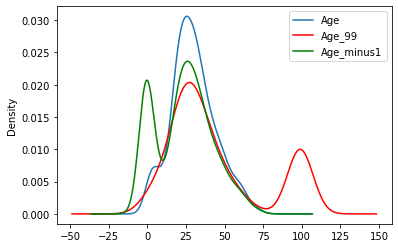

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

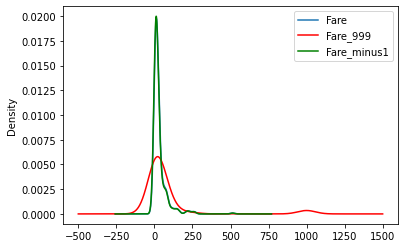

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [47]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [48]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


In [49]:
# Using Sklearn

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [50]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [51]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [52]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [53]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [54]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [55]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

**Note** Ya technique amooman tab use ki jati hai jab data randomly missing na ho kuch chunks mein miss ho , is ki madad sy ham ya show karwa daity hen ka data yahan sy missing hai( matlab ya aik qisam ka hint ky toor par kaam karta hai)

##### *End of Distribution Imputation*

Ya technique Arbitrary Value Imputation ki hi aik type hai is mein random value ki jaga extream value pick ki jati hai taky missing data ko outliers mein daal diya jay .
- Agar Normaly Distributed ho to ( mean + 
- Agar Skewed ho to (Q1 - 1.5 IQR) , (Q3 + 1.5IQR) where IQR = Q3 - Q1 

##### *Mean Median Distribution*

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [58]:
df = pd.read_csv('D:\git\jaan_repo\ML_a_to_z\ml_resources/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [60]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [61]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [64]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [65]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [66]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [67]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
380,42.0,227.5250,0,42.00,42.000000,227.5250,227.5250
122,32.5,30.0708,1,32.50,32.500000,30.0708,30.0708
828,NaN,7.7500,0,28.75,29.785904,7.7500,7.7500
147,9.0,34.3750,4,9.00,9.000000,34.3750,34.3750
507,NaN,26.5500,0,28.75,29.785904,26.5500,26.5500


Jab bhi mean median imputation karen gy to data ka variance shrink ho jay ga matlab ka data ka spread kam ho jay ga or ziada data center(mean) ki taraf aa jay ga

In [68]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.09102197536
Fare Variance after mean imputation:  2324.2385256705534


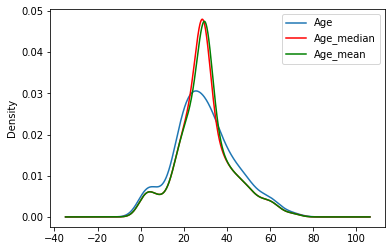

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

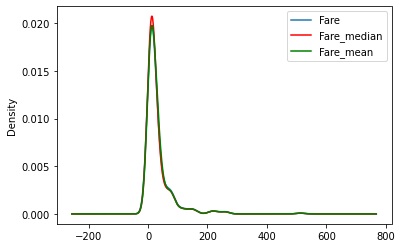

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [71]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [72]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<AxesSubplot:>

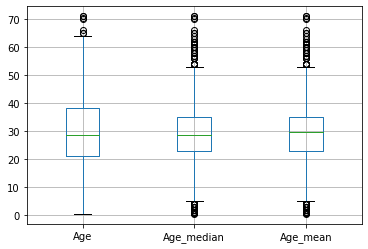

In [73]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<AxesSubplot:>

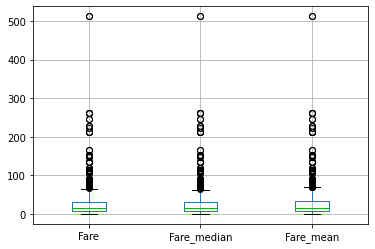

In [74]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

In [75]:
# Using Sklearn

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [76]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [77]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [78]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [79]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [80]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [81]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [82]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

#### **Categorical**

##### *Frequent Value Imputation*

- Ya Technique Bhi MCAR par hi lagy gi or is mein value ko mode(most frequent) sy replace kia jata hai 
- Ya technique amoman Categorical data par hi apply karty hen, Numerical par bhi apply kar sakty hen magar suggested nahi hai.
- Mode variable ki ratio baqi variables sy kafi ziada honi chahiya.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('D:\git\jaan_repo\ML_a_to_z\ml_resources/house_prices\HousePrices_train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [86]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<AxesSubplot:>

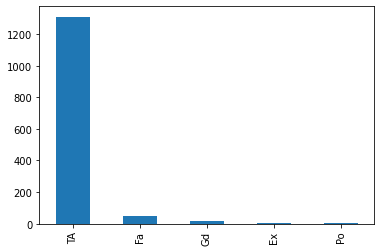

In [87]:
df['GarageQual'].value_counts().plot(kind='bar')

In [88]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

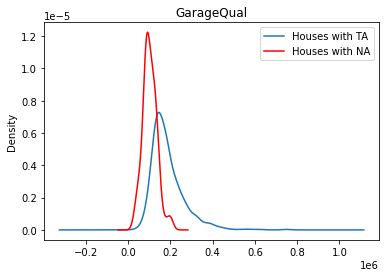

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [90]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [91]:
df['GarageQual'].fillna('TA', inplace=True)

<AxesSubplot:>

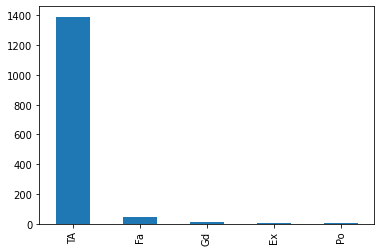

In [92]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

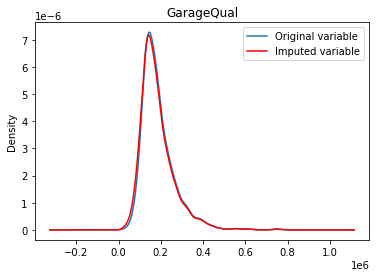

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<AxesSubplot:>

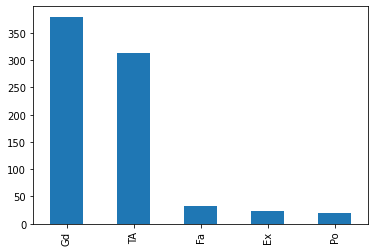

In [94]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [95]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

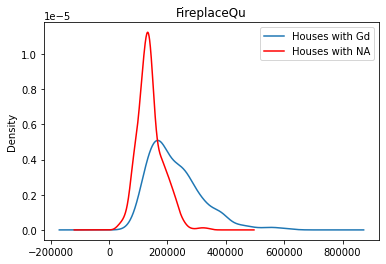

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [97]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [98]:
df['FireplaceQu'].fillna('Gd', inplace=True)

<AxesSubplot:>

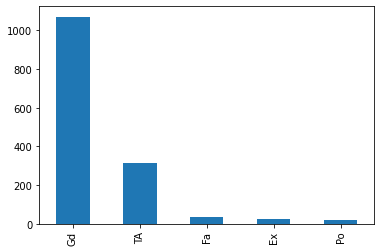

In [99]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

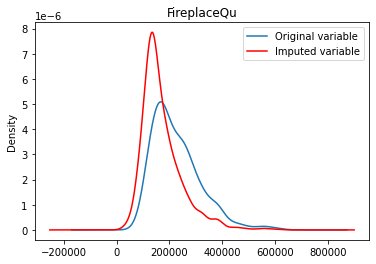

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [102]:
from sklearn.impute import SimpleImputer

In [103]:
imputer = SimpleImputer(strategy='most_frequent')

In [104]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

c:\Users\Jahanzaib\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [105]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

##### *Missing Category Imputation*

Categorical data agar missing data ki percentage 10% sy ziada ho to Phir usy Mode sy replace nahi karen or usy 'Missing' category mein daal den.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv('D:\git\jaan_repo\ML_a_to_z\ml_resources/house_prices\HousePrices_train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [108]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

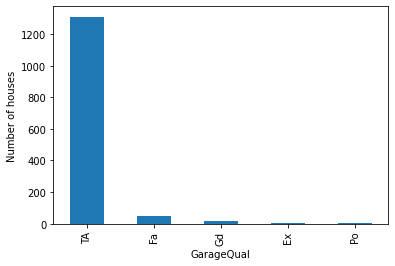

In [109]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [110]:
df['GarageQual'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of houses')

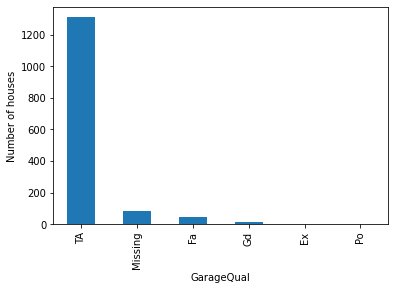

In [111]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [113]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [114]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

c:\Users\Jahanzaib\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [115]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

### Random Sample Imputation

- Random Sample Imputation mein missing values randomly impute hoti hen.
    - magar yaad rahy wo random value bhi data say hi pick ki jati hai
- Ya technique Numerical and Categorical donon par apply kar sakty hen.
- Ya technique sklearn ki bajay Pandas sy apply ho gi
- Ya technique Tree Algorithms ki bajay Linear Algorithms par apply karna chahiya kyunka Tree Algorithms mein missing values ko outliers bana dety hen or Linear Algorithms mein outliers ko ignore karta hai.
- Is sy data ka distribution distort nahi hota.

In [116]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv('D:\git\jaan_repo\ML_a_to_z\ml_resources/titanic1.csv' ,usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [122]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [123]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [125]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [126]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [127]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [128]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [129]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([ 4.  , 36.  , 30.  , 45.  , 36.  , 40.  , 42.  , 22.  , 52.  ,
        9.  , 27.  ,  7.  , 21.  , 24.  , 52.  ,  1.  , 22.  , 42.  ,
       18.  ,  0.75, 61.  , 29.  , 19.  , 24.  , 11.  ,  4.  , 66.  ,
       20.  , 31.  , 24.  , 29.  , 33.  , 21.  , 30.  , 35.  , 33.  ,
       64.  , 32.  , 15.  , 22.  , 58.  , 24.  , 25.  , 18.  , 23.  ,
       58.  , 15.  , 62.  , 50.  , 47.  , 16.  ,  4.  , 17.  , 48.  ,
       41.  , 19.  , 23.  , 19.  , 19.  , 22.  , 42.  , 40.  , 33.  ,
       32.  ,  2.  , 29.  , 38.  , 47.  , 42.  , 60.  , 40.  , 27.  ,
       22.  , 18.  , 28.5 , 36.  , 49.  , 40.  ,  5.  , 18.  , 60.  ,
       28.5 , 29.  , 38.  ,  8.  , 21.  , 35.  , 61.  , 24.  , 30.  ,
       20.  , 23.  ,  3.  , 35.  , 17.  , 38.  , 30.  , 37.  , 40.  ,
        0.83, 36.  , 28.  ,  4.  , 26.  , 37.  , 63.  , 36.  , 30.  ,
       34.  , 34.  , 27.  , 32.  , 25.  ,  2.  ,  6.  , 36.  , 21.  ,
       28.  , 36.  , 21.  , 39.  , 46.  , 21.  , 37.  , 33.  , 23.  ,
       30.  ,  8.  ,

In [130]:
X_train['Age'].isnull().sum()

148

In [131]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,26.0
493,71.0,49.5042,71.0
527,NaN,221.7792,23.0


c:\Users\Jahanzaib\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Jahanzaib\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


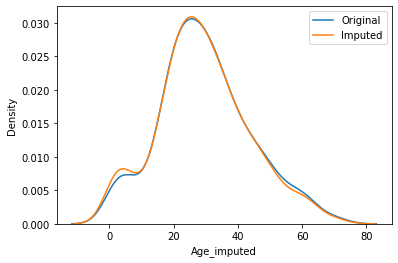

In [132]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [133]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  204.47467856871944


In [134]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,75.358755
Age,71.512440,204.349513,204.349513
Age_imputed,75.358755,204.349513,204.474679


<AxesSubplot:>

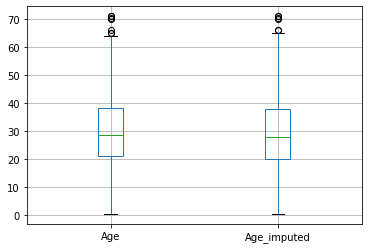

In [135]:
X_train[['Age', 'Age_imputed']].boxplot()

**Note** Jesy ka pahly kaha gya hai ka random imputer mein data randomly pick hota hai to same input par har baar different answer aa sakta hai ( kunka aik baar jo values missing values ko fill karen gi maybe next time different aa jaen)
For example model ko server par deploy kia ha or user ny 'fare' ki value 50 dali hai or usy koe specific answer mill gya kunka imputer ny 'age' ka liya koe value select kar li hai, magar jab user dobara same fare ki value put kary ga to ab usy different answer milly ga kuna ab age ka koe different value select ho gya hai.and that's not good thing.
Is liya ham chahty hen ka aik baar fare ki kisi value ka liya age ki koe value select ho jay to next time bhi fare ki us value ky liya wohi age aani chahiya.

In [136]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

NameError: name 'observation' is not defined

In [138]:
data = pd.read_csv('D:\git\jaan_repo\ML_a_to_z\ml_resources/house_prices\HousePrices_train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [139]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [140]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [141]:
X = data
y = data['SalePrice']

In [142]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [143]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [144]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
975,NaN,TA,165000,TA,NaN
747,Gd,TA,265979,TA,Gd
159,Gd,TA,320000,TA,Gd
622,NaN,TA,135000,TA,NaN
314,Gd,Fa,178000,Fa,Gd


In [145]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


C:\Users\Jahanzaib\AppData\Local\Temp\ipykernel_3544\613679808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\Jahanzaib\AppData\Local\Temp\ipykernel_3544\613679808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\Jahanzaib\AppData\Local\Temp\ipykernel_3544\613679808.py:4: SettingWithCopyWarni

In [146]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [147]:
temp

,original,imputed
TA,0.951043,0.952911
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [148]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.643098
TA,0.412439,0.546577
Fa,0.040917,0.051627
Po,0.027823,0.035915
Ex,0.024550,0.033670


c:\Users\Jahanzaib\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Jahanzaib\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Jahanzaib\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Plea

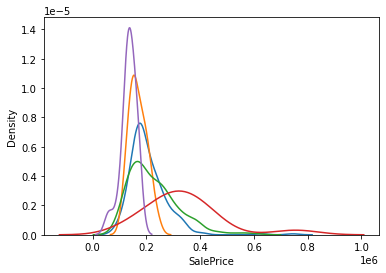

In [149]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

c:\Users\Jahanzaib\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Jahanzaib\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Jahanzaib\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Plea

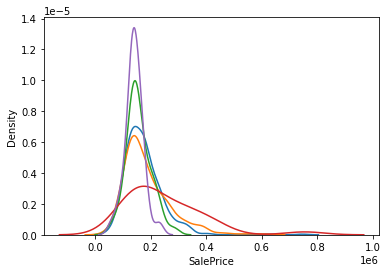

In [150]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

### Missing Indicator

Is technique mein har missing data valy column ka liya aik alag sy column banaya jata hai, jismein boolean variable T or F hoti hai. T matlab missing value hai or F matlab missing value nahi hai. 

In [151]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import MissingIndicator,SimpleImputer

In [152]:
df = pd.read_csv('D:\git\jaan_repo\ML_a_to_z\ml_resources/titanic1.csv' ,usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [153]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [154]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [155]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [156]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [157]:
X_train_trf

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]])

In [158]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

In [159]:
mi = MissingIndicator()

mi.fit(X_train)

MissingIndicator()

In [160]:
mi.features_

array([0], dtype=int64)

In [161]:
X_train_missing = mi.transform(X_train)

In [164]:
X_train_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [166]:
X_test_missing = mi.transform(X_test)

In [167]:
X_test_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [168]:
X_train['Age_NA'] = X_train_missing

In [169]:
X_test

,Age,Fare
707,42.0,26.2875
37,21.0,8.0500
615,24.0,65.0000
169,28.0,56.4958
68,17.0,7.9250
...,...,...
89,24.0,8.0500
80,22.0,9.0000
846,NaN,69.5500
870,26.0,7.8958


In [170]:
X_test['Age_NA'] = X_test_missing

In [171]:
X_train

,Age,Fare,Age_NA
30,40.0,27.7208,False
10,4.0,16.7000,False
873,47.0,9.0000,False
182,9.0,31.3875,False
876,20.0,9.8458,False
...,...,...,...
534,30.0,8.6625,False
584,NaN,8.7125,True
493,71.0,49.5042,False
527,NaN,221.7792,True


In [172]:
si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [173]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

Simple Imputer mein bhi 'add_indicator' parameter hota hai jo missing value ko True kar deta hai or us column ko add kar deta hai.
to jo kaam uper kia ha usy direct aik code sy bhi kar sakty hen.

In [174]:
# Direct Method

si = SimpleImputer(add_indicator=True)

In [175]:
X_train = si.fit_transform(X_train)

In [176]:
X_test = si.transform(X_test)

In [177]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

### Automatically Select Imputer Parameters

Iski madad sy sklearn sab tecniques ko use karta hai or Best Technique select karta hai.

In [178]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [181]:
df = pd.read_csv('D:\git\jaan_repo\ML_a_to_z\ml_resources/titanic1.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [182]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [183]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,male,40.0,0,0,27.7208,C
10,3,female,4.0,1,1,16.7000,S
873,3,male,47.0,0,0,9.0000,S
182,3,male,9.0,4,2,31.3875,S
876,3,male,20.0,0,0,9.8458,S


In [186]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [187]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [188]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [189]:
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [190]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [191]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [192]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.788


In [193]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
4,1.0,most_frequent,mean,0.787852
5,1.0,most_frequent,median,0.787852
6,1.0,constant,mean,0.787852
7,1.0,constant,median,0.787852
8,10,most_frequent,mean,0.787852
9,10,most_frequent,median,0.787852
10,10,constant,mean,0.787852
11,10,constant,median,0.787852
12,100,most_frequent,mean,0.787852
13,100,most_frequent,median,0.787852


## Multivariate Imputation

### KNN Imputer

- KNN mein har row aik Multidimentional **Vector** ha or us vector mein agar koe value missing hai to us value ko usky neighbours ky values se predict kia jata hai.
- Yahan *k* sy murad neighbour ki tadaad hoti hai, agar *k* ki value 3 put karen gy to 3 neighbours ki value lay kar uska mean calculate kia jata hai.
- or neighbours ki value find karny ka liya ** NaN Euclidean Distance** use kia jata hai. jo ka Eucledian distance ki hi modifiaction hai.
- sklearn mein iski class hai KNNImputer
- Nan Eucledian Distance ka formula hai

***Technique***

sqrt(weight * sq distance from present coordinates)
where weight = (Total No of Coordinates) / (No of Coordinates present)

|A|B|C|D|
|-----|------|-----|------|
|30|-|20|-|
|40|50|60|70|

- yahan B column ki value fill karni hai to usy chor ky baqi 3 columns bachy jo ka aik 3 dimentional vector hai.

weight = 3/2 = 1.5

= sqrt(1.5 * ((40-30)^2 + (60-20)^2)

= sqrt(1.5 * (100 + 1600))

= sqrt(1700)

= 41.3

In [194]:
# import libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [195]:
df = pd.read_csv('D:\git\jaan_repo\ML_a_to_z\ml_resources/titanic1.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [196]:
df = df[['Age','Pclass','Fare','Survived']]
df.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [197]:
df.isnull().sum()

Age         177
Pclass        0
Fare          0
Survived      0
dtype: int64

In [198]:
X = df.iloc[:,0:3]
y = df.iloc[:,3]

## 'Survived' column ko output or baqi ko input variable bnaya
## X = df.drop(columns = ['Survived'])
## y = df['Survived']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=  2)
X_train.head()

,Age,Pclass,Fare
30,40.0,1,27.7208
10,4.0,3,16.7000
873,47.0,3,9.0000
182,9.0,3,31.3875
876,20.0,3,9.8458


In [200]:
knn = KNNImputer(n_neighbors=3, weights='distance')

## weight parameter ki default value 'Uniform' hai jisme sabhi neighbours ko equal weight diya jata hai
## 'Distance' weight parameter me weight sabhi neighbours ko distance ke hisab se diya jata hai
## 'Distance ' Parameter uniformsy better perform karta hai.

- Weight paramerter ki *uniform* value mein neighbours ki value ka mean liya jata hai
- jabka *distance* mein har value ko distance ka reciprocal sy multiply kar ky mean liya jata hai

In [201]:
X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [202]:
pd.DataFrame(X_train_trf, columns = X_train.columns)

,Age,Pclass,Fare
0,40.000000,1.0,27.7208
1,4.000000,3.0,16.7000
2,47.000000,3.0,9.0000
3,9.000000,3.0,31.3875
4,20.000000,3.0,9.8458
...,...,...,...
707,30.000000,3.0,8.6625
708,26.151292,3.0,8.7125
709,71.000000,1.0,49.5042
710,32.666667,1.0,221.7792


In [203]:
lr = LogisticRegression()

In [204]:
lr.fit(X_train_trf,y_train)
y_pred = lr.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.7150837988826816

In [205]:
# Comparision with Simple Imputer --> mean

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [206]:
lr = LogisticRegression()

lr.fit(X_train_trf2,y_train)

y_pred2 = lr.predict(X_test_trf2)

accuracy_score(y_test,y_pred2)

0.6927374301675978

Yahn ham daikh sakty hen ka KNN sy accuracy 71.50 % hai or Simple Imputer sy 69.27 % hai.

### MICE Imputation

*MICE* stands for Multivariate Imputation by Chained Equations.
- Ya technique MAR(Missing at random) par sahi sy kaam karti hai

***Technique***

*Actual Data*
|Sr|R&D Spend|	Administration|	Marketing Spend|Profit|
|---|-----|------|-----|------|
|21	|8.0|	15.0|	30.0|	11.0|
|37	|4.0|	5.0|	20.0|	9.0|
|2	|15.0|	10.0|	41.0|	19.0|
|14	|12.0|	16.0|	26.0|	13.0|
|44	|2.0|	15.0|	3.0|	7.0|

*Input*
|Sr|R&D Spend|	Administration|	Marketing Spend|
|---|-----|------|-----|
|21	|8.0|	15.0|	30.0|
|37	|4.0|	5.0|	20.0|
|2	|15.0|	10.0|	41.0|
|14	|12.0|	16.0|	26.0|
|44	|2.0|	15.0|	3.0|

*Fake NaN*
|Sr|R&D Spend|	Administration|	Marketing Spend|
|---|-----|------|-----|
|21	|8.0|	15.0|	30.0|
|37	|NaN|	5.0|	20.0|
|2	|15.0|	10.0|	41.0|
|14	|12.0|	NaN|	26.0|
|44	|2.0|	15.0|	NaN|

**Iteration 0** 

*Step:1*
Replace NaN with mean of column
|Sr|R&D Spend|	Administration|	Marketing Spend|
|---|-----|------|-----|
|21	|8.0|	15.0|	30.0|
|37	|9.25|	5.0|	20.0|
|2	|15.0|	10.0|	41.0|
|14	|12.0|	11.25|	26.0|
|44	|2.0|	15.0|29.25|

**Iteration 1** 
*Step:2*

*(i)*

Column 1(R&D Spend) ka NaN(Jinhen abhi Mean sy replace kia tha) phir sy NaN kar den.
or wo rows jinmen Nan hai unhen ignore kar ka column 1 ka baqi data ab output column ban jay ga (italic). or baqi sary columns ka data(Column 1 ki Nan valiues nikalny ky baad) input data ban jay ga (bold).
|Sr|R&D Spend|	Administration|	Marketing Spend|
|---|-----|------|-----|
|21	|*8.0*|	**15.0**|	**30.0**|
|37	|NaN|	5.0|	20.0|
|2	|*15.0*|	**10.0**|	**41.0**|
|14	|*12.0*|	**11.25**|	**26.0**|
|44	|*2.0*|	**15.0**|**29.25**|

*(ii)*

|Sr|	Administration|	Marketing Spend|
|---|------|-----|
|21	|	15.0|	30.0|
|2	|	10.0|	41.0|
|14	|	11.25|	26.0|
|44	|	15.0|29.25|

is data ko train karen or koe bhi algorithem apply karen jis sy column 1 ka data predict ho jay ga.
phir 1st columnka  NaN ko predict ki value sy replace karen.
|Sr|R&D Spend|	Administration|	Marketing Spend|
|---|-----|------|-----|
|21	|8.0|	15.0|	30.0|
|37	|**23.14**|	5.0|	20.0|
|2	|15.0|	10.0|	41.0|
|14	|12.0|	11.25|	26.0|
|44	|2.0|	15.0|29.25|


- Phr yahi same steps next columns ka liya repeat karen.
- Jab sb columns ki values replace ho jaen to **Iteration 1** mein sy **Iteration 0** subtract karen or difference daikhen. 
- ya iterations tab tak dohraen jab tak difference 0 na ho jay.

***Working***

In [207]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

In [208]:
df = pd.read_csv('D:\git\jaan_repo\ML_a_to_z\ml_resources/50_startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [209]:
df = df.sample(5)
df

## Dataset mein sy sample nikal liya

,R&D Spend,Administration,Marketing Spend,State,Profit
27,72107.60,127864.55,353183.81,New York,105008.31
28,66051.52,182645.56,118148.20,Florida,103282.38
1,162597.70,151377.59,443898.53,California,191792.06
49,0.00,116983.80,45173.06,California,14681.40
41,27892.92,84710.77,164470.71,Florida,77798.83


In [210]:
df = df.iloc[:,0:-2]
df

## last 2 column eliminate kar diya

,R&D Spend,Administration,Marketing Spend
27,72107.60,127864.55,353183.81
28,66051.52,182645.56,118148.20
1,162597.70,151377.59,443898.53
49,0.00,116983.80,45173.06
41,27892.92,84710.77,164470.71


In [211]:
df.iloc[1,0] = np.NaN
df.iloc[3,1] = np.NaN
df.iloc[-1,-1] = np.NaN
df

##Kuch random Nan fill kiya

,R&D Spend,Administration,Marketing Spend
27,72107.60,127864.55,353183.81
28,NaN,182645.56,118148.20
1,162597.70,151377.59,443898.53
49,0.00,NaN,45173.06
41,27892.92,84710.77,NaN


In [212]:
# Step 1

df0 = pd.DataFrame()

df0['R&D Spend'] = df['R&D Spend'].fillna(df['R&D Spend'].mean())
df0['Administration'] = df['Administration'].fillna(df['Administration'].mean())
df0['Marketing Spend'] = df['Marketing Spend'].fillna(df['Marketing Spend'].mean())

## Har column ki missing value ko mean sy replace kar diya

In [213]:
# Iteration 0
df0

,R&D Spend,Administration,Marketing Spend
27,72107.600,127864.5500,353183.81
28,65649.555,182645.5600,118148.20
1,162597.700,151377.5900,443898.53
49,0.000,136649.6175,45173.06
41,27892.920,84710.7700,240100.90


In [214]:
# Remove the col1 imputed value
df1 = df0.copy()

df1.iloc[1,0] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
27,72107.60,127864.5500,353183.81
28,NaN,182645.5600,118148.20
1,162597.70,151377.5900,443898.53
49,0.00,136649.6175,45173.06
41,27892.92,84710.7700,240100.90


In [215]:
X = df1.iloc[[0,2,3,4],1:3]
X

## index 1 row mein NaN hai is liya usy skip kiya or index 0 column ko bhi skip kiya(kunka wo output bany ga)

,Administration,Marketing Spend
27,127864.5500,353183.81
1,151377.5900,443898.53
49,136649.6175,45173.06
41,84710.7700,240100.90


In [216]:
y = df1.iloc[[0,2,3,4],0]
y

## index 1 row ko skip kar ky baqi index 0 column output ban gya 

27     72107.60
1     162597.70
49         0.00
41     27892.92
Name: R&D Spend, dtype: float64

In [217]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[1,1:].values.reshape(1,2))

c:\Users\Jahanzaib\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([64117.50775588])

In [218]:
df1.iloc[1,0] = 84301.4335
df1

,R&D Spend,Administration,Marketing Spend
27,72107.6000,127864.5500,353183.81
28,84301.4335,182645.5600,118148.20
1,162597.7000,151377.5900,443898.53
49,0.0000,136649.6175,45173.06
41,27892.9200,84710.7700,240100.90


In [219]:
df1.iloc[3,1] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
27,72107.6000,127864.55,353183.81
28,84301.4335,182645.56,118148.20
1,162597.7000,151377.59,443898.53
49,0.0000,NaN,45173.06
41,27892.9200,84710.77,240100.90


In [220]:
X = df1.iloc[[0,1,2,4],[0,2]]
X

,R&D Spend,Marketing Spend
27,72107.6000,353183.81
28,84301.4335,118148.20
1,162597.7000,443898.53
41,27892.9200,240100.90


In [221]:
y = df1.iloc[[0,1,2,4],1]
y

27    127864.55
28    182645.56
1     151377.59
41     84710.77
Name: Administration, dtype: float64

In [222]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[3,[0,2]].values.reshape(1,2))

c:\Users\Jahanzaib\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([127277.15591401])

In [223]:
df1.iloc[3,1] = 43422.3145
df1

,R&D Spend,Administration,Marketing Spend
27,72107.6000,127864.5500,353183.81
28,84301.4335,182645.5600,118148.20
1,162597.7000,151377.5900,443898.53
49,0.0000,43422.3145,45173.06
41,27892.9200,84710.7700,240100.90


In [224]:
df1.iloc[4,-1] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
27,72107.6000,127864.5500,353183.81
28,84301.4335,182645.5600,118148.20
1,162597.7000,151377.5900,443898.53
49,0.0000,43422.3145,45173.06
41,27892.9200,84710.7700,NaN


In [225]:
X = df1.iloc[0:4,0:2]
X

,R&D Spend,Administration
27,72107.6000,127864.5500
28,84301.4335,182645.5600
1,162597.7000,151377.5900
49,0.0000,43422.3145


In [226]:
y = df1.iloc[0:4,-1]
y

27    353183.81
28    118148.20
1     443898.53
49     45173.06
Name: Marketing Spend, dtype: float64

In [227]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[4,0:2].values.reshape(1,2))

c:\Users\Jahanzaib\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([128294.85435076])

In [228]:
df1.iloc[4,-1] = 165002.3857
df1

,R&D Spend,Administration,Marketing Spend
27,72107.6000,127864.5500,353183.8100
28,84301.4335,182645.5600,118148.2000
1,162597.7000,151377.5900,443898.5300
49,0.0000,43422.3145,45173.0600
41,27892.9200,84710.7700,165002.3857


In [229]:
df1 - df0

,R&D Spend,Administration,Marketing Spend
27,0.0000,0.000,0.0000
28,18651.8785,0.000,0.0000
1,0.0000,0.000,0.0000
49,0.0000,-93227.303,0.0000
41,0.0000,0.000,-75098.5143


In [230]:
df2 = df1.copy()

df2.iloc[1,0] = np.NaN

df2

# or isy repeat kia jay ga

,R&D Spend,Administration,Marketing Spend
27,72107.60,127864.5500,353183.8100
28,NaN,182645.5600,118148.2000
1,162597.70,151377.5900,443898.5300
49,0.00,43422.3145,45173.0600
41,27892.92,84710.7700,165002.3857
